In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
Wave = pd.read_excel(r'0-ML_course project-3.xlsx',sheet_name='wave data')
DEL = pd.read_excel(r'0-ML_course project-3.xlsx',sheet_name='damage')

In [8]:
Hs=[]
Tp=[]
D=[]
for i in range(len(Wave.iloc[:,0])):
    Hs.append(Wave.iloc[i,0])
    Tp.append(Wave.iloc[i,1])
    index=Wave.iloc[i,0]/0.05*201+(Wave.iloc[i,1]-2)/0.05
    D.append(DEL.iloc[int(index),2])
SHs=[]
STp=[]
SD=[]
for i in range(len(DEL.iloc[:,0])):
    SHs.append(DEL.iloc[i,0])
    STp.append(DEL.iloc[i,1])
    SD.append(DEL.iloc[i,2])

In [9]:
exact=np.mean(D)
print('Exact solution= ',exact)

Exact solution=  1.0243125490765762e-05


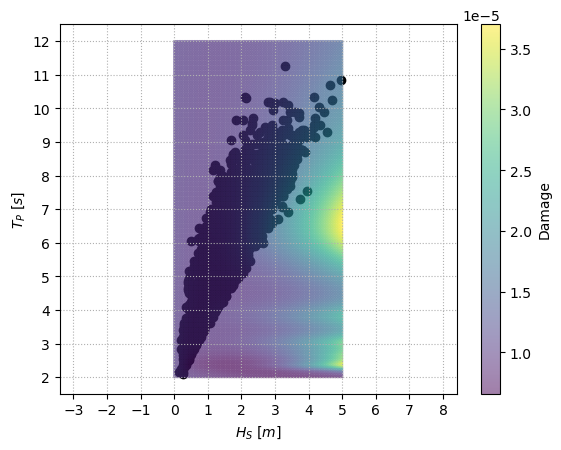

In [4]:
plt.figure()
plt.scatter(Hs, Tp, color='k')
plt.scatter(SHs, STp, c=SD, cmap='viridis', s=0.5, alpha=0.5 )
cbar=plt.colorbar(label='Damage')
plt.xlabel('$H_S$ $[m]$'); plt.ylabel('$T_P$ $[s]$')
plt.grid(axis='both', linestyle=':');
plt.xticks(range(-3, 9, 1)); plt.yticks(range(2, 13, 1));
plt.axis('equal');

In [5]:
# (1) K-means clustering; damage by average

X=list(zip(Hs,Tp))
X=np.array(X)

k_values1=list(range(2,100))
epsilon=0.05

d_k_values1_avg=[]
for k in k_values1:
    # K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    # print(f"\n*Results for k={k} clusters:")
    # print("Cluster Centers:")
    # print(cluster_centers)
    
    # plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', alpha=0.5, label='Data Points')
    # plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c='r', edgecolors='k', marker='^', label='Cluster Centers')
    # plt.xlabel('$H_S$ $[m]$')
    # plt.ylabel('$T_P$ $[s]$')
    # plt.grid(axis='both', linestyle=':')
    # plt.axis('equal')
    # plt.show();

    # Damage at cluster centers
    damage_values = []
    for i in range(k):
        condition = ( np.abs( SHs-cluster_centers[i,0] )<epsilon ) & ( np.abs( STp-cluster_centers[i,1] )<epsilon )
        # print("Number of SD values: ",np.count_nonzero(condition))
        damage_i = pd.DataFrame(SD).loc[condition].mean()
        damage_values.append(damage_i)
        # print(f"Damage at cluster {i} center: {damage_i[0]}")

    # Probability of clusters
    cluster_counts = np.bincount(labels)
    cluster_prob = cluster_counts / len(labels)
    # print("Cluster Probabilities:")
    # print(cluster_prob)

    # Calculate the overall damage for the current value of k
    d_k = np.sum( np.array(damage_values).flatten() * cluster_prob[:k] )
    d_k = np.sum( np.array(damage_values).flatten() * np.array(cluster_prob) )
    # print(f"Overall damage for k={k}: {d_k}")
    d_k_values1_avg.append(d_k)
    
print("\n**List of overall damage values for each k:")
print(d_k_values1_avg)


**List of overall damage values for each k:
[1.0175853023757578e-05, 1.0235369796819888e-05, 1.0213138795646929e-05, 1.0183038123349945e-05, 1.0227441371747685e-05, 1.0211905200377026e-05, 1.0229791899277621e-05, 1.0198876885461795e-05, 1.023129445956313e-05, 1.0209810484793542e-05, 1.0208428839701449e-05, 1.0220923068386667e-05, 1.0199726379235634e-05, 1.0220484548835194e-05, 1.022034048784918e-05, 1.0198788481164078e-05, 1.0225042218179644e-05, 1.0226866475854484e-05, 1.0216127554831838e-05, 1.0222813651500796e-05, 1.0206405446620271e-05, 1.02064251842676e-05, 1.0235062895217915e-05, 1.0220590430930615e-05, 1.0228711044609338e-05, 1.022629505720132e-05, 1.0225445230945376e-05, 1.0230575814815542e-05, 1.0233691894399808e-05, 1.0226462384440418e-05, 1.0230665133997727e-05, 1.022496033904636e-05, 1.0240275958721405e-05, 1.0226818733153783e-05, 1.0222796542318237e-05, 1.022393207791134e-05, 1.0238163995904682e-05, 1.0232938114947223e-05, 1.0232437772128706e-05, 1.0227293184680611e-05, 1

In [6]:
# (2) K-means clustering; damage by distance

X=list(zip(Hs,Tp))
X=np.array(X)

k_values2=list(range(2,100))

d_k_values2_dis=[]
for k in k_values2:
    # K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    # print(f"\n*Results for k={k} clusters:")
    # print("Cluster Centers:")
    # print(cluster_centers)
    
    # plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', alpha=0.5, label='Data Points')
    # plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c='r', edgecolors='k', marker='^', label='Cluster Centers')
    # plt.xlabel('$H_S$ $[m]$')
    # plt.ylabel('$T_P$ $[s]$')
    # plt.grid(axis='both', linestyle=':')
    # plt.axis('equal')
    # plt.show();

    # Damage at cluster centers
    cluster_centers_dis = np.round(cluster_centers*2,1)/2
    damage_values = []
    for i in range(k):
        condition = ( SHs==cluster_centers_dis[i,0] ) & ( STp==cluster_centers_dis[i,1] )
        # print("Number of SD values: ",np.count_nonzero(condition))
        damage_i = pd.DataFrame(SD).loc[condition]
        damage_values.append(damage_i)
        # print(f"Damage at cluster {i} center: {damage_i.iloc[0,0]}")
        
    # Probability of clusters
    cluster_counts = np.bincount(labels)
    cluster_prob = cluster_counts / len(labels)
    # print("Cluster Probabilities:")
    # print(cluster_prob)

    # Calculate the overall damage for the current value of k
    d_k = np.sum( np.array(damage_values).flatten() * cluster_prob[:k] )
    d_k = np.sum( np.array(damage_values).flatten() * np.array(cluster_prob) )
    # print(f"Overall damage for k={k}: {d_k}")
    d_k_values2_dis.append(d_k)
    
print("\n**List of overall damage values for each k:")
print(d_k_values2_dis)


**List of overall damage values for each k:
[1.0149476615556559e-05, 1.0245503117477758e-05, 1.019485854311509e-05, 1.0203455586314817e-05, 1.0203440430031848e-05, 1.0205459612578185e-05, 1.0209746149196818e-05, 1.0204599605992893e-05, 1.0202627413802395e-05, 1.0208850705503557e-05, 1.0201076410024647e-05, 1.0204150459993947e-05, 1.022495802142907e-05, 1.0221241136670452e-05, 1.0207118324642142e-05, 1.0230234395993643e-05, 1.0210227939518736e-05, 1.0216629643541656e-05, 1.0224355937134439e-05, 1.021758540573308e-05, 1.0223264030411475e-05, 1.0223255285331852e-05, 1.0221692399370416e-05, 1.0220625984901756e-05, 1.0225083183860165e-05, 1.0219740571617202e-05, 1.0223895682260228e-05, 1.0234923185908018e-05, 1.0222540195017493e-05, 1.0238538083711759e-05, 1.0221070651076158e-05, 1.0231819593807082e-05, 1.0232113436285484e-05, 1.0221425592059793e-05, 1.0232999690222862e-05, 1.0232648974074629e-05, 1.0234217912299754e-05, 1.0231423359179476e-05, 1.0238707332338056e-05, 1.0228465075682551e-0

In [18]:
print('**Difference in percentage:')
print('')
diff_km1 = [ (exact-value)/exact*100 for value in d_k_values1_avg ]
print(np.round(diff_km1,3))
print('')
diff_km2 = [ (exact-value)/exact*100 for value in d_k_values2_dis ]
print(np.round(diff_km2,3))
print('')

**Difference in percentage:

[ 0.657  0.076  0.293  0.587  0.153  0.305  0.13   0.432  0.116  0.325
  0.339  0.217  0.424  0.221  0.222  0.433  0.177  0.159  0.264  0.198
  0.358  0.358  0.079  0.22   0.141  0.164  0.173  0.123  0.092  0.163
  0.122  0.177  0.028  0.159  0.198  0.187  0.048  0.099  0.104  0.155
  0.079  0.073  0.094  0.124  0.069  0.072  0.157  0.056  0.09   0.063
  0.05   0.064 -0.014  0.055  0.076  0.135  0.077  0.092  0.023  0.107
  0.038  0.075  0.102  0.107  0.053  0.094  0.105  0.073  0.027  0.019
  0.033  0.057  0.069  0.079  0.087  0.088  0.065  0.049  0.067  0.067
  0.098  0.061  0.092  0.064  0.103  0.11   0.062  0.047  0.01   0.023
  0.028  0.045  0.051  0.116  0.004  0.037 -0.024  0.025]

[ 0.914 -0.023  0.471  0.387  0.387  0.368  0.326  0.376  0.395  0.335
  0.411  0.38   0.177  0.214  0.352  0.126  0.321  0.259  0.183  0.249
  0.194  0.194  0.209  0.22   0.176  0.228  0.188  0.08   0.201  0.045
  0.215  0.11   0.108  0.212  0.099  0.102  0.087  0.114  0.

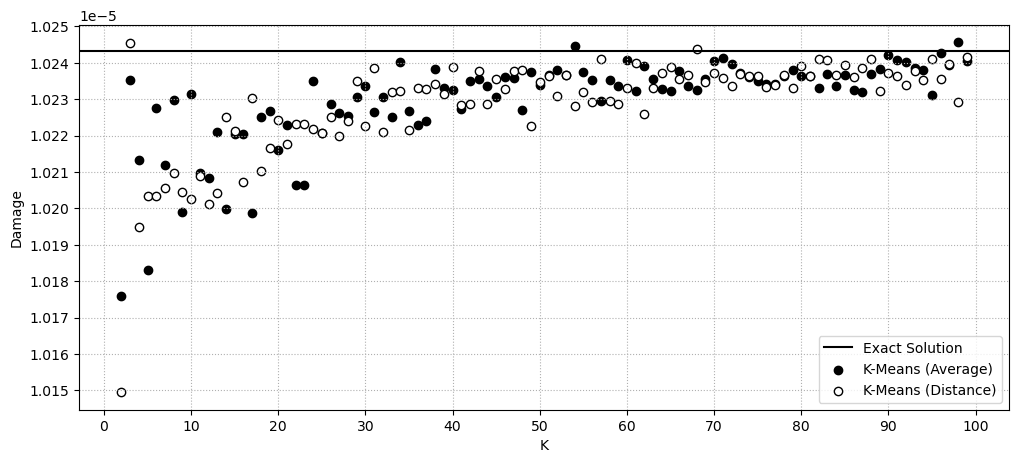

In [16]:
plt.figure(figsize=(12,5))
plt.axhline(y=exact, color='k', linestyle='-', label='Exact Solution')
plt.scatter(k_values1, d_k_values1_avg, color='k', edgecolor='k', marker='o', label='K-Means (Average)')
plt.scatter(k_values2, d_k_values2_dis, color='w', edgecolor='k', marker='o', label='K-Means (Distance)')
plt.xlabel('K'); plt.ylabel('Damage')
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.yticks([1.015e-5,1.016e-5,1.017e-5,1.018e-5,1.019e-5,1.020e-5,1.021e-5,1.022e-5,1.023e-5,1.024e-5,1.025e-5])
plt.legend(); plt.grid(axis='both', linestyle=':'); plt.show();